In [47]:
import keras
from keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np

In [48]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [49]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [63]:
labels={
    0:'Airplane',
    1:'Automobile',
    2:'Bird',
    3:'Cat',
    4:'Deer',
    5:'Dog',
    6:'Frog',
    7:'Horse',
    8:'Ship',
    9:'Truck',
}

array([1], dtype=uint8)

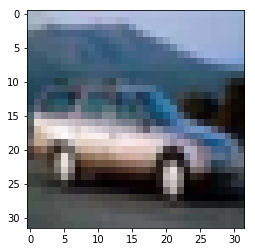

In [64]:
plt.imshow(x_train[4])
y_train[4]

In [43]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [22]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),input_shape=(32,32,3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(32,(3,3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32,(3,3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(32,(3,3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10))
model.add(keras.layers.Activation('softmax'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_21 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
activation_22 (Activation)   (None, 12, 12, 32)        0         
__________

In [24]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [25]:
model.fit(x_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
50000/50000 [==============================] - 61s 1ms/step - loss: 1.7261 - acc: 0.3863
Epoch 2/30
50000/50000 [==============================] - 60s 1ms/step - loss: 1.4255 - acc: 0.5004
Epoch 3/30
50000/50000 [==============================] - 62s 1ms/step - loss: 1.3372 - acc: 0.5374
Epoch 4/30
50000/50000 [==============================] - 65s 1ms/step - loss: 1.3043 - acc: 0.5534
Epoch 5/30
50000/50000 [==============================] - 62s 1ms/step - loss: 1.3033 - acc: 0.5579
Epoch 6/30
50000/50000 [==============================] - 62s 1ms/step - loss: 1.3147 - acc: 0.5576
Epoch 7/30
50000/50000 [==============================] - 60s 1ms/step - loss: 1.3304 - acc: 0.5545
Epoch 8/30
50000/50000 [==============================] - 61s 1ms/step - loss: 1.3452 - acc: 0.5490
Epoch 9/30
50000/50000 [==============================] - 63s 1ms/step - loss: 1.3638 - acc: 0.5439
Epoch 10/30
50000/50000 [==============================] - 61s 1ms/step - loss: 1.3950 - acc: 0.5323

KeyboardInterrupt: 

In [26]:
loss,acc=model.evaluate(x_test,y_test)
print(loss,acc)

10000/10000 [==============================] - 4s 411us/step
1.442627023124695 0.5383


In [73]:
pred=model.predict(x_test)

Horse


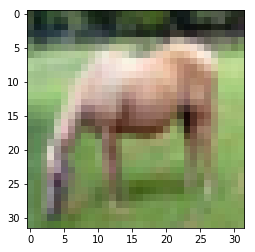

In [75]:
plt.imshow(x_test[698])
print(labels[np.argmax(pred[698])])